# KNN 

In [ ]:
## Choose Factor K
 menentukan jumlah k (n_neighbors)

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor # calc VIF
from sklearn.model_selection import train_test_split # membagi data menjadi data test dan data train
from sklearn.metrics import accuracy_score # menilai seberapa akurat model kita
from sklearn.neighbors import KNeighborsClassifier # untuk model KNN
from sklearn.preprocessing import MinMaxScaler # normalisasi data
from

In [34]:
wine = pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [35]:
# buat kolom baru bernama label
wine['label'] = [1 if i>6 else 0 for i in wine['quality']]

In [36]:
# mengisi null value
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)

In [37]:
# kita tentukan feature(X) dan label(y)

X = wine[['alcohol','density']]
y = wine['label']

In [38]:
# Splitting data 

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify = y, # agar perbandingan jumlah data targetnya untuk train dan test (misal: default) nanti mirip dengan data aslinya
    test_size = 0.2, # proporsi test set adalah 20% dari total data
    random_state = 2020 # untuk memastikan data konsisten
    )

In [39]:
# Fitting data dengan KNN (data belajar)
# Coba dengan k=3 

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_predict_class = knn.predict(X_test)

In [40]:
print('model accuracy in test dataset', accuracy_score(y_test, y_predict_class))

model accuracy in test dataset 0.9038461538461539


In [41]:
# Normalisasi data, agar tidak terjadi bias
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_predict_class = knn.predict(X_test_scaled)

In [43]:
print('model accuracy in test dataset', accuracy_score(y_test, y_predict_class))

model accuracy in test dataset 0.9807692307692307


In [44]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)

    y_predict_train = knn.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))

    y_predict_test = knn.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracies.append(acc_score)

    if score < acc_score:
        score = acc_score
        best_k = i



In [63]:
k

range(1, 30, 2)

In [62]:
best_k

17

In [64]:
score

0.9903846153846154

In [46]:
training_accuracies

[0.9975961538461539,
 0.9831730769230769,
 0.9759615384615384,
 0.9711538461538461,
 0.9807692307692307,
 0.9759615384615384,
 0.9783653846153846,
 0.9735576923076923,
 0.9639423076923077,
 0.9567307692307693,
 0.9519230769230769,
 0.9519230769230769,
 0.9471153846153846,
 0.9423076923076923,
 0.9399038461538461]

<function matplotlib.pyplot.show(*args, **kw)>

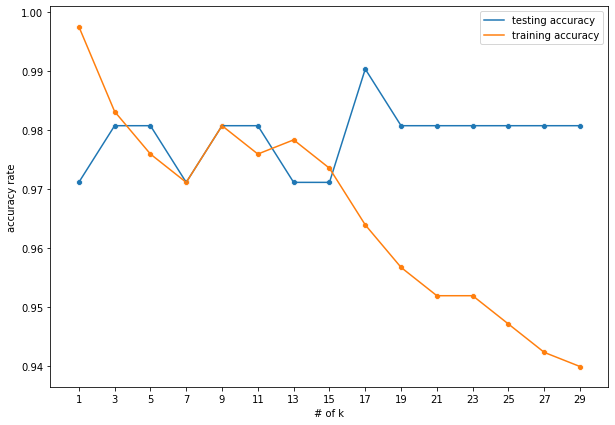

In [61]:
# buat line chart untuk mencari akurasi maksimum di k berapa 

plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xlabel('# of k')
plt.ylabel('accuracy rate')
plt.xticks(list(k))
plt.show


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
# model Decision Tree ditaro dalam variable
tree = DecisionTreeClassifier(
    criterion ='gini',
    max_depth = 2
)

# Fitting data
tree.fit(X_train, y_train)
y_predict_class = tree.predict(X_test)

In [50]:
# menghitung akurasi
print('model accuracy in test datatest Decision Tree:', accuracy_score(y_test, y_predict_class))

model accuracy in test datatest Decision Tree: 0.9519230769230769


In [51]:
from sklearn.tree import plot_tree

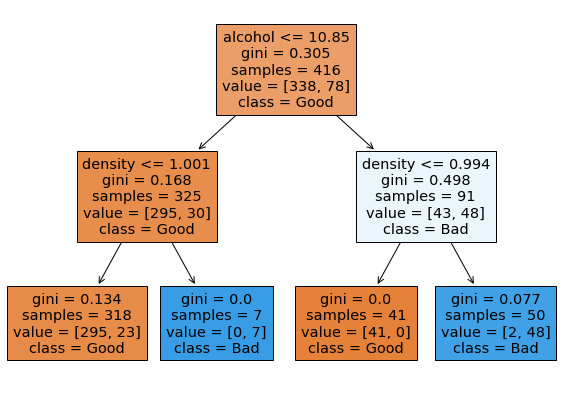

In [52]:
# Plot Tree 
plt.figure(figsize=(10,7))
plot_tree(tree, feature_names=list(X), class_names=['Good','Bad'], filled=True)
plt.show()

In [56]:
# Coba dengan data yg dinormalisasi

# Normalisasi data, agar tidak terjadi bias
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# model Decision Tree
tree = DecisionTreeClassifier(
    criterion ='gini',
    max_depth = 2,
)

# Fitting data
tree.fit(X_train_scaled, y_train)
y_predict_class = tree.predict(X_test_scaled)

In [58]:
# menghitung akurasi
print('model accuracy in test datatest Decision Tree Normalized:', accuracy_score(y_test, y_predict_class))

model accuracy in test datatest Decision Tree Normalized: 0.9519230769230769


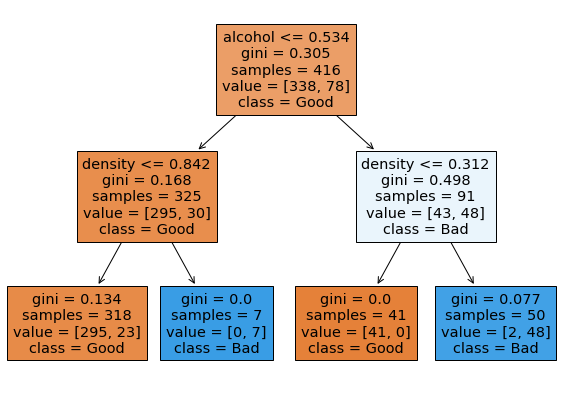

In [60]:
# Plot Tree 
plt.figure(figsize=(10,7))
plot_tree(tree, feature_names=list(X), class_names=['Good','Bad'], filled=True)
plt.show()

## Akurasi tidak berubah

ini dikarenakan hanya skalanya yg berubah, tapi heterogenitas data tidak berubah.
Decision Tree memperhatikan heterogenitas

- sebelum scaling : 0, 20, 20, 30, 30, 30, 70, 90, 100 
- sesudah scaling : 0, 0.2, 0.2, 0.3, 0.3, 0.3, 0.7, 0.9, 1 

setelah dilakukan percabangan pertama (misal >50):
- sebelum scaling : 70, 90, 100 
- sesudah scaling : 0.7, 0.9, 1 

heterogenitas tetap sama, tetap sama2 berjumlah 3 kelompok,
maka dari itu akurasi tidak berubah.


## Exercise

Find the best K for KNN model with cancer_data.csv.  
Use decision tree classifier on cancer_data.csv, compare the accuracy with KNN, which one is better?  

> Use features with _mean in it, 20% data test and random state 2020

Kirim ke Brigita.gems@gmail.com  
subject: Latihan Classification
